# Compare weights between TF and Chang's model

# MikeNet weights

In [2]:
import numpy as np
from mnutil import MikeNetWeight
mn_weights = MikeNetWeight('Reading_Weight_v1')

Weight Keys: ['Phono -> psh', 'Con -> csh', 'psh -> Semantics', 'csh -> Semantics', 'Semantics -> SemCleanup', 'SemCleanup -> Semantics', 'Bias -> Semantics', 'Bias -> SemCleanup', 'Bias -> psh', 'Bias -> csh', 'Semantics -> sph', 'sph -> Phono', 'Phono -> PhoCleanup', 'PhoCleanup -> Phono', 'Bias -> Phono', 'Bias -> sph', 'Bias -> PhoCleanup', 'Ortho -> oph', 'Ortho -> osh', 'oph -> Phono', 'osh -> Semantics', 'Bias -> oph', 'Bias -> osh']

Non-weight Keys: ['SimulatorSeed 425840429', 'TAOS Phono', 'DELAYS Phono', 'TAOS psh', 'DELAYS psh', 'TAOS sph', 'DELAYS sph', 'TAOS Semantics', 'DELAYS Semantics', 'TAOS SemCleanup', 'DELAYS SemCleanup', 'TAOS PhoCleanup', 'DELAYS PhoCleanup', 'TAOS Bias', 'DELAYS Bias', 'TAOS Ortho', 'DELAYS Ortho', 'TAOS oph', 'DELAYS oph', 'TAOS osh', 'DELAYS osh', 'TAOS Con', 'DELAYS Con', 'TAOS csh', 'DELAYS csh']


# Plot all weights density in MN

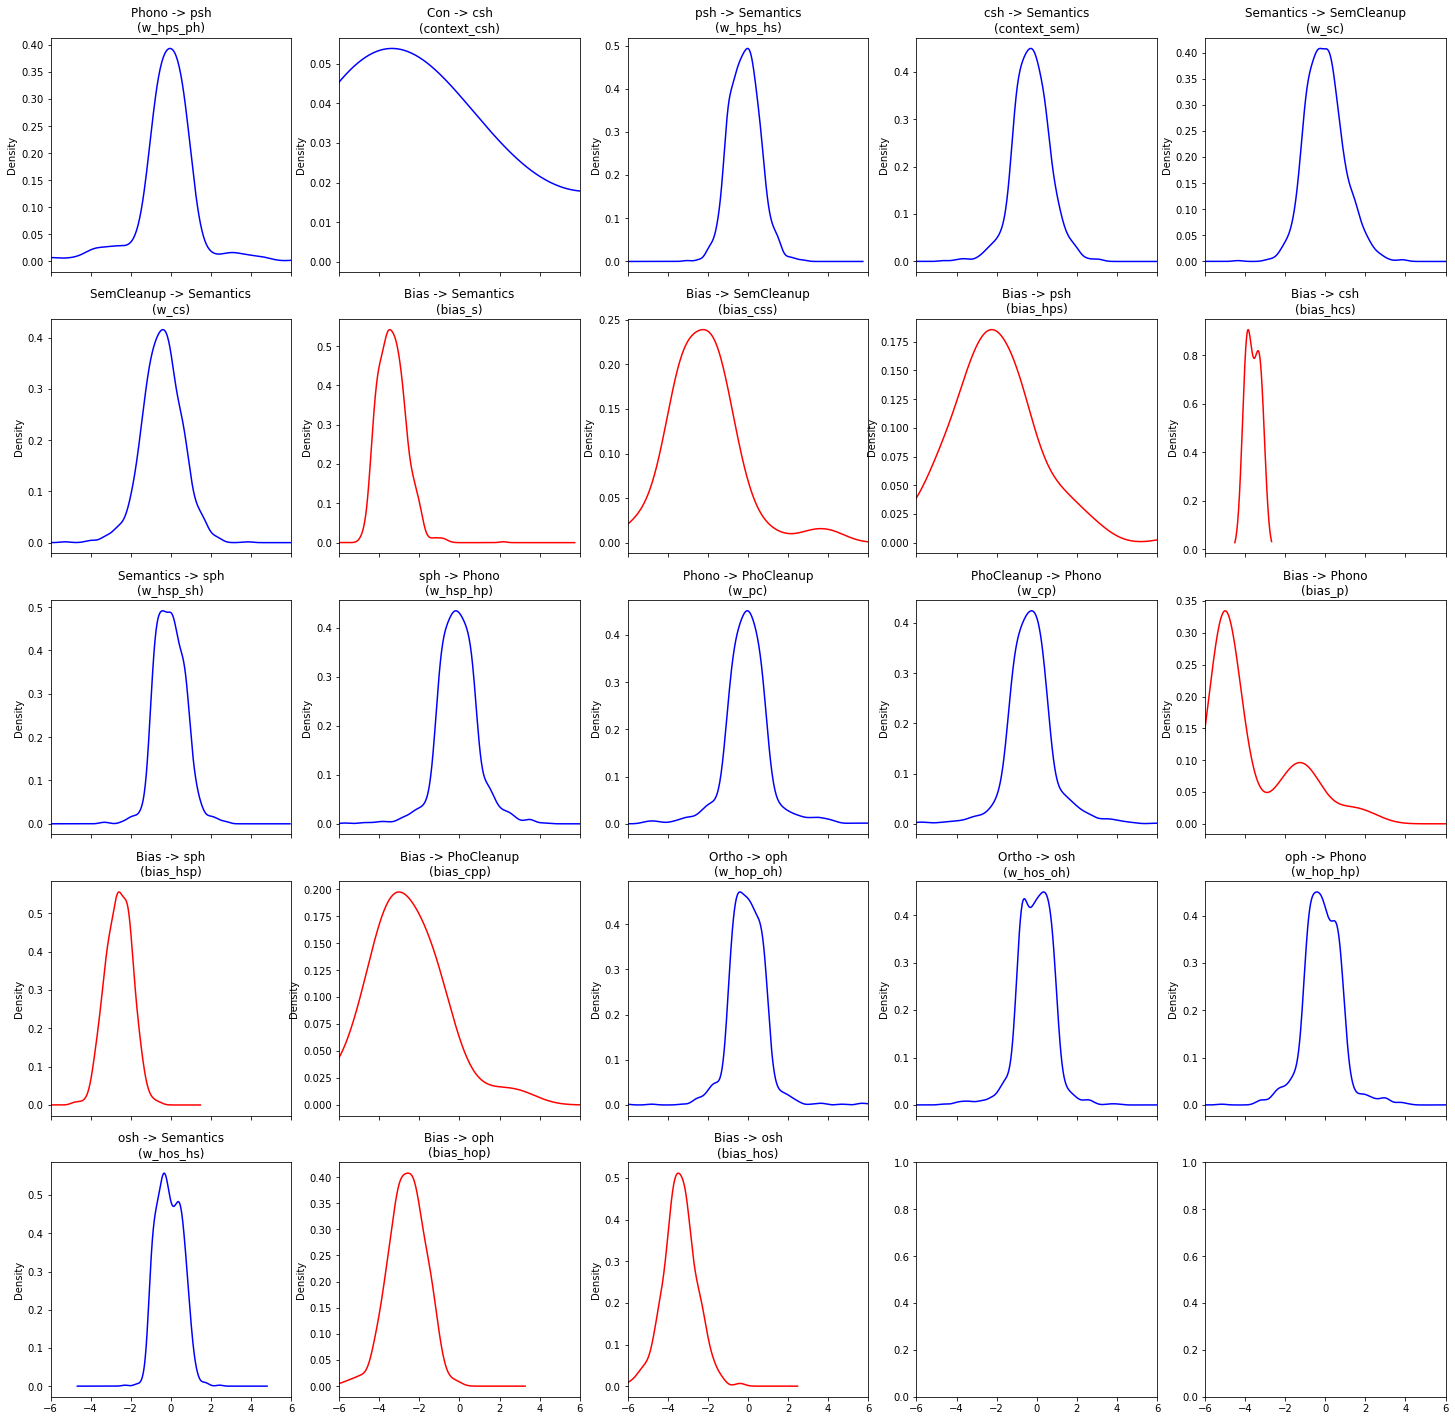

In [4]:
mn_plot_all = mn_weights.plot_all(xlim=[-6, 6])
mn_plot_all.savefig(os.path.join("plots", "all_mn_weights.png"))

# TF weights

In [7]:
import troubleshooting
os.chdir(os.environ.get('TF_ROOT'))

batch_name = 'station_3'
code_name = 'station_3_r0001'
epoch = 500
d = troubleshooting.Diagnosis(f"{batch_name}/{code_name}")
d.eval('train_r100', task='triangle', epoch=epoch)

# Plotting weight comparisons

w_hps_ph
context_csh
w_hps_hs
context_sem
w_sc
w_cs
bias_s
bias_css
bias_hps
bias_hcs
w_hsp_sh
w_hsp_hp
w_pc
w_cp
bias_p
bias_hsp
bias_cpp
w_hop_oh
w_hos_oh
w_hop_hp
w_hos_hs


/triangle_model/src/troubleshooting.py:402: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 2, figsize=(10, 5), sharex=True, sharey=True)


bias_hop
bias_hos


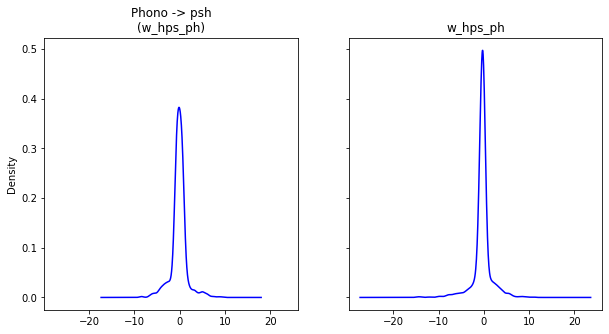

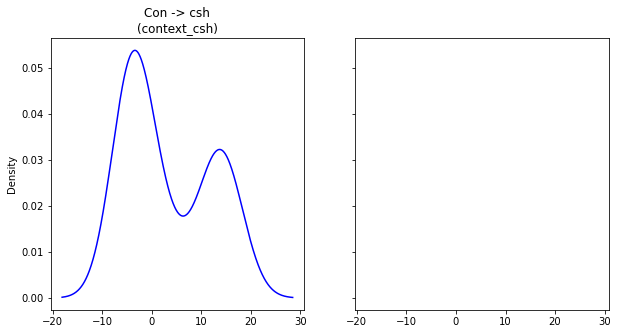

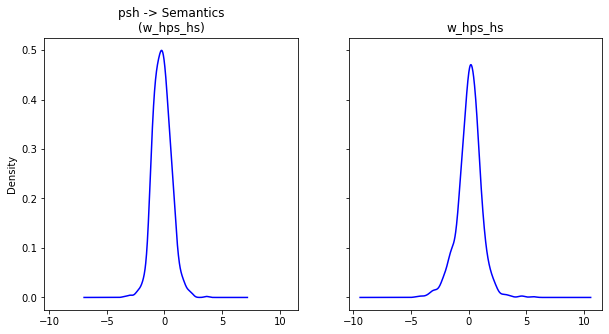

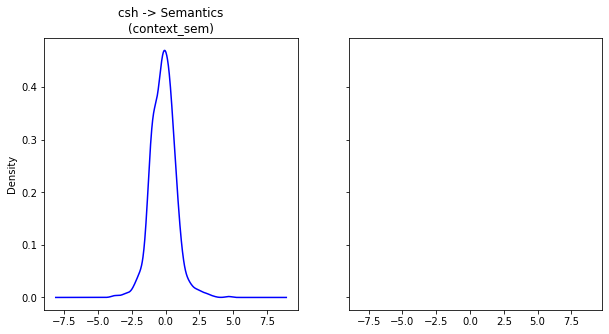

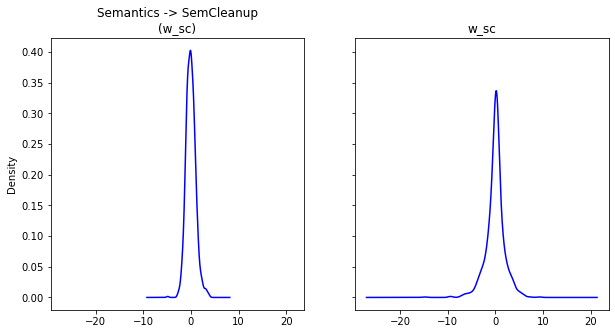

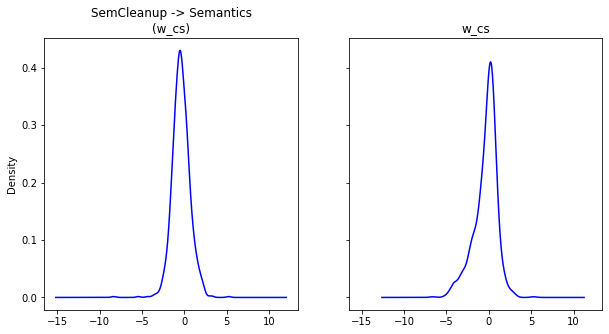

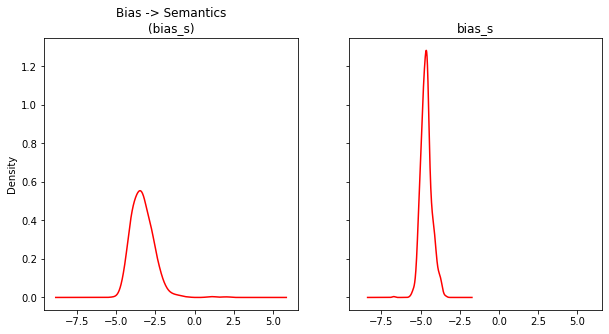

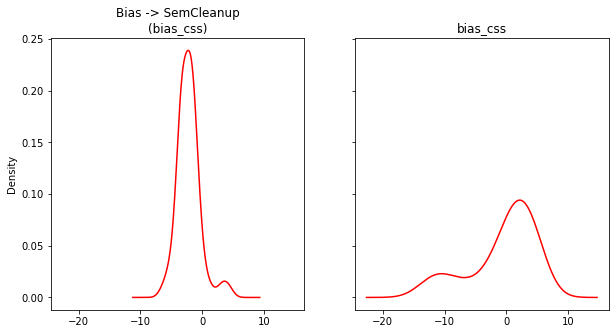

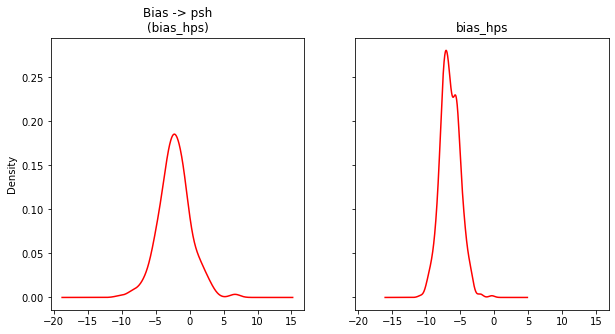

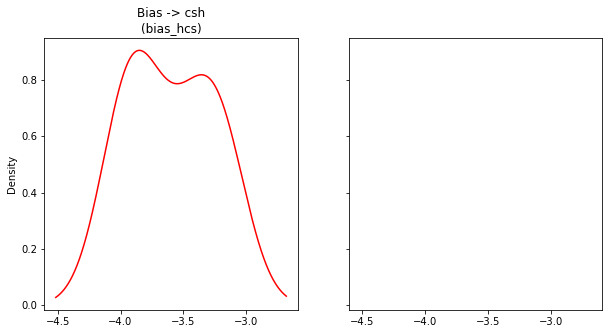

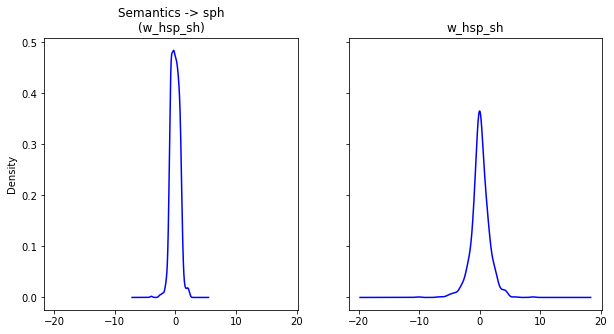

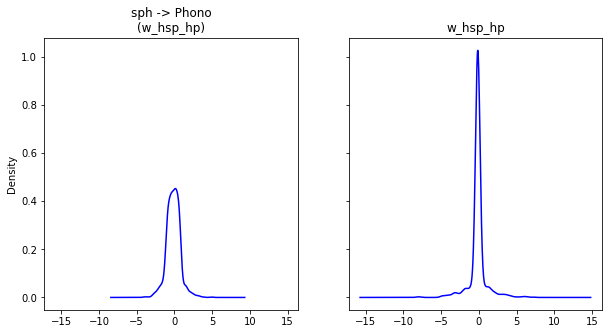

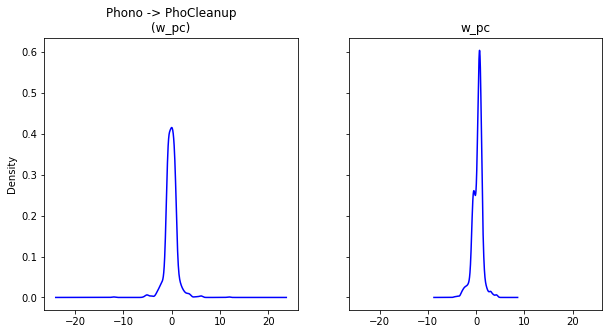

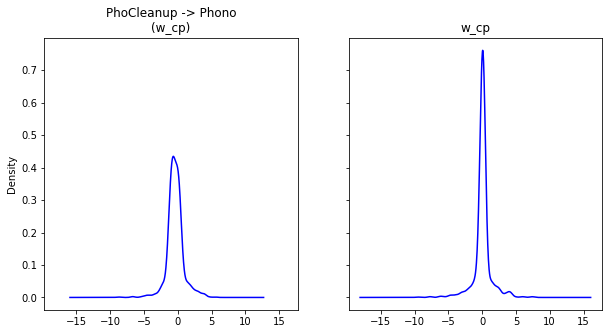

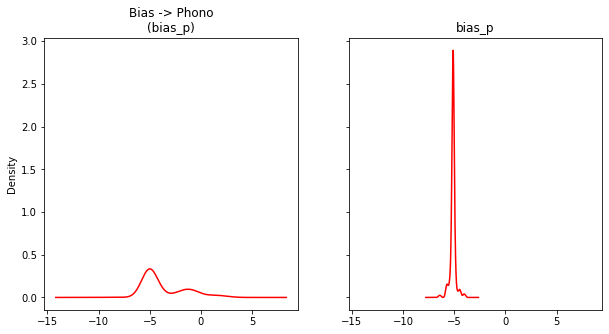

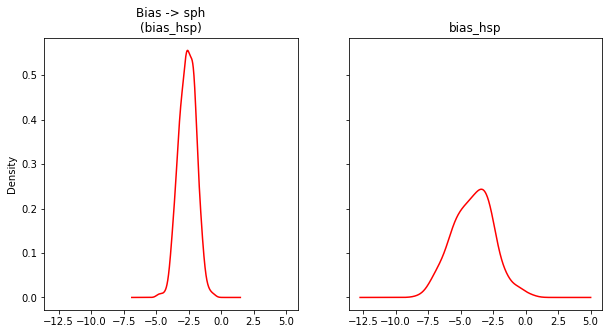

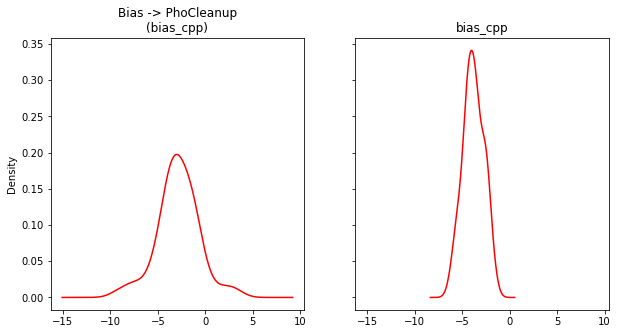

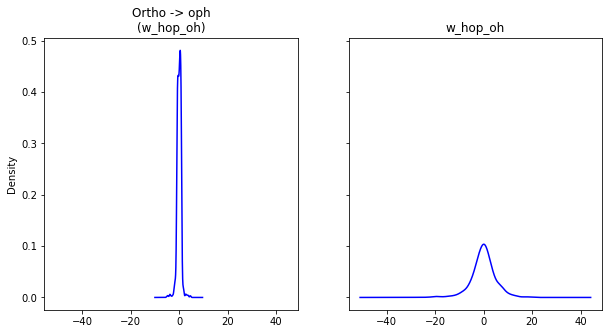

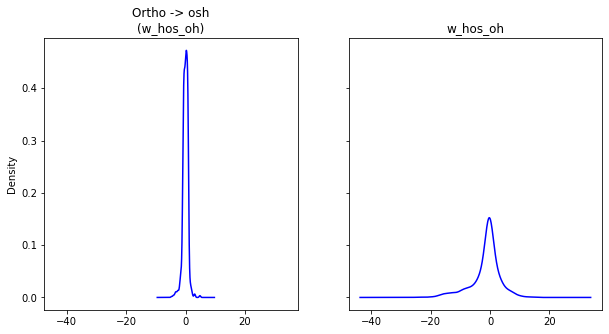

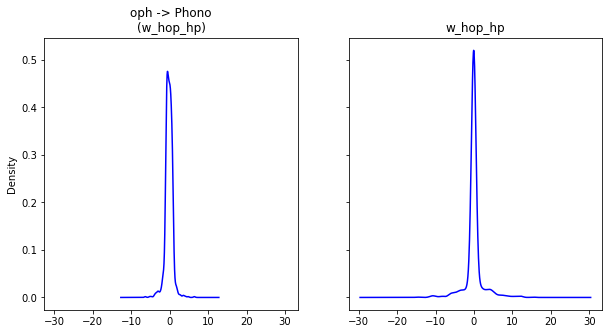

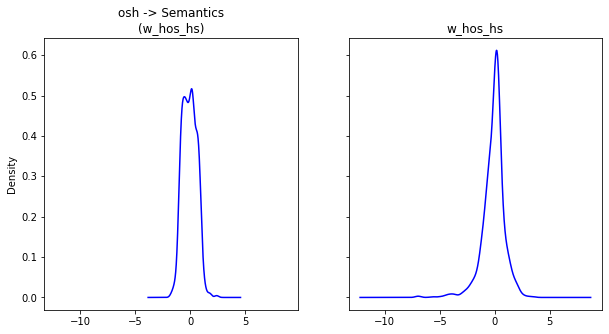

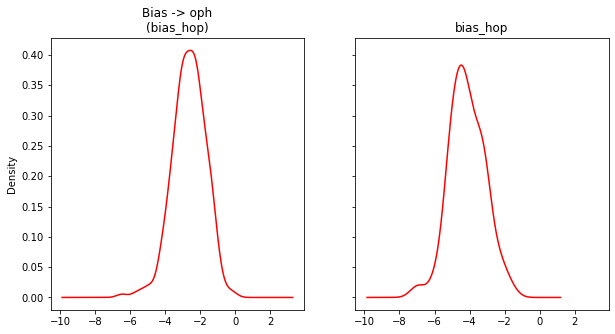

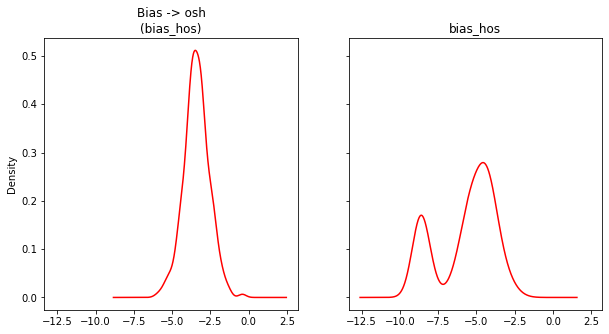

In [17]:
compare_plot_dir = os.path.join(d.cfg.plot_folder, "compare_mn_weights")
os.mkdir(compare_plot_dir, exist_ok=True)

for x in mn_weights.weight_keys:
    w_name = mn_weights.as_tf_name(x)
    print(w_name)
    try:
        tmp = troubleshooting.dual_plot(d, mn_weights, w_name)
        tmp.savefig(compare_plot_dir, f"{w_name}.png"))
    except IndexError:
        pass
    
